In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
import copy

In [2]:
def loadIrisData():
    iris = load_iris()
    X=iris['data']
    t=iris['target']
    print(X.shape)
    print(t.shape)
    return X, t
# y, t = loadIrisData()
# np.insert(y,0,1,axis=0)

In [3]:
def one_hot_encoding(t_indices, N):
    '''
    Inputs:
        t_indices: list of indices
        N: total no. of classes
    '''
    assert N>max(t_indices), (N, max(t_indices))

    ### WRITE YOUR CODE HERE - 2 MARKS
    one_hot_encoded = np.zeros((len(t_indices), N))
    unique_list = np.unique(t_indices)
    print(unique_list)
    for i in unique_list:
        idx = np.where(t_indices==i)[0]
#         print(idx)
        one_hot_encoded[idx, i] = 1

    t_1hot = one_hot_encoded
    return t_1hot
# one_hot_encoding(t, 3)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [4]:
def test_one_hot_encoding():
    t_1hot = one_hot_encoding([0,2], 3)
    t_1hotTrue = np.array([[1.,0.,0.], [0.,0.,1.]])
    assert np.all(np.isclose( t_1hot, t_1hotTrue ))
    print('Test passed', '\U0001F44D')
if __name__=="__main__":
    test_one_hot_encoding()

[0 2]
Test passed 👍


In [5]:
def splitData(X,t,testFraction=0.2):
    """
    Use numpy functions only
    Inputs:
        X: np array of shape (Nsamples, dim)
        t: np array of len Nsamples; can be one hot vectors or labels
        testFraction: (float) Nsamples_test = testFraction * Nsamples
    """

    ### WRITE YOUR CODE HERE - 2 MARKS
#     print(np.floor(len(X)*testFraction))
    arr = np.arange(len(X))
    np.random.shuffle(arr)
    X = X[arr]
    t = t[arr]
    
    X_test = X[:int(np.floor(testFraction*len(X))), :]
    t_test = t[:int(np.floor(testFraction*len(t))), :]
    
    X_train = X[int(np.floor(testFraction*len(X))):, :]
    t_train = t[int(np.floor(testFraction*len(t))):, :]
    
    return X_train, t_train, X_test, t_test

In [37]:
def test_splitData():
    X = np.random.random((5,2))
    t1hot = one_hot_encoding([1,0,2,1,2],3)
    X_train, t1hot_train, X_test, t1hot_test = splitData(X,t1hot,.2)
    assert X_train.shape==(4,2), ["X_train.shape", X_train.shape]
    assert X_test.shape==(1,2), ["X_test.shape", X_test.shape]
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_splitData()

Test passed 👍


In [6]:
### Normalize data to be of zero mean and unit variance
def normalizeX(X_train, X_test):
    '''
    Inputs:
        X_train: np array 2d
        X_test: np array 2d
    Outputs:
        Normalized np arrays 2d
    '''

    ### WRITE YOUR CODE HERE - 2 MARKS
    
    X_test_normalized = (X_test-np.float32([np.mean(X_test, axis=0)]))
    X_test_normalized = X_test_normalized/np.float32([np.std(X_test_normalized, axis=0)])
    X_train_normalized = (X_train-np.float32([np.mean(X_train, axis=0)]))
    X_train_normalized = X_train_normalized/np.float32([np.std(X_train_normalized, axis=0)])

    return X_train_normalized, X_test_normalized

In [7]:
def test_normalizeX():
    X_train = np.array([[1,1,0],[2,2,1]])
    X_test = np.array([[1,1,0],[3,3,2]])
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    a = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    b = np.array([[-1.,-1.,-1.], [ 1., 1., 1.]])
    assert np.all(np.isclose( X_train_normalized, a )), a
    assert np.all(np.isclose( X_test_normalized, b )), b
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_normalizeX()

Test passed 👍


In [8]:
def sigmoid(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    
    y = 1. / (1. + np.exp(-x))
    return y

In [9]:
def test_sigmoid():
    x = np.array([np.log(4),np.log(0.25),0])
    y = sigmoid(x)
    assert np.all(np.isclose( y, np.array([0.8, 0.2, 0.5]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_sigmoid()

Test passed 👍


In [10]:
def softmax(x):
    '''
    Input:
        x: numpy array of any shape
    Output:
        y: numpy array of same shape as x
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    
    y = np.exp(x)/(np.sum(np.exp(x)))
    
    return y

In [11]:
def test_softmax():
    x = np.array([np.log(2),np.log(7),0])
    y = softmax(x)
    assert np.all(np.isclose( y, np.array([0.2, 0.7, 0.1]) )), y
    print('Test passed', '\U0001F44D')    
if __name__=="__main__":
    test_softmax()

Test passed 👍


In [44]:
def sigmoid_derivative(x):
    '''
    Input:
        x: numpy array of any shape; it is sigmoid layer's output
    Output:
        y: numpy array of same shape as x; it is the derivative of sigmoid
    '''

    ### WRITE YOUR CODE HERE - 1 MARKS
    
    y = np.exp(-x)/np.square((1. + np.exp(-x)))
    
    return y

In [89]:
class NeuralNetwork:
    def __init__(self, ni, nh, no):
        '''   
        Input:
            ni: int, size of input layer
            nh: int, size of hidden layer
            no: int, size of output layer
        Action:
            Creates instance variables
        NOTE: We do not use bias explicitly here. Input x can have the first element 1 to have a bias term.
        '''
        self.ni = ni
        self.nh = nh
        self.no = no
        self.weights1 = []
        self.weights2 = []
        return
    
    def init_weights(self):
        '''
        Action:
            Randomly initialize weights1 and weights2 with proper size random np arrays
        '''

        ### WRITE YOUR CODE HERE - 2 MARKS
#         self.weights1 = np.reshape(np.random.rand((ni+1)*(nh+1)), ((nh+1), (ni+1)))
#         self.weights2 = np.reshape(np.random.rand((no)*(nh+1)), ((no), (nh+1)))
        self.weights1 =2*np.random.rand(self.nh,self.ni+1)-1
        self.weights2 =2*np.random.rand(self.no,self.nh+1)-1
    
    def predict(self, x):
        x = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x)
        v1 = sigmoid(h1)
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        return v2

    def backprop(self,x,y,eta):
        '''
        # application of the chain rule to find derivative of the categorical cross entropy loss function with respect to weights2 and weights1
        Input:
            x: numpy array of shape (ni,1)
            y: numpy array of shape (no,1)
            eta: learning rate
        Action:
            # Finding the derivatives
            del_weights2: np array that stores the derivative of the loss function with respect to weights2
            del_weights1: np array that stores the derivative of the loss function with respect to weights1

            # Update the weights with the derivative of the categorical cross entropy loss function
              weights1 += eta*del_weights1
              weights2 += eta*del_weights2
        ''' 

        ### WRITE YOUR CODE HERE - 5 MARKS
        x1 = np.insert(x,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h1 = self.weights1.dot(x1)
        v1 = sigmoid(h1)
        
        v = copy.deepcopy(v1)
        
        v1 = np.insert(v1,0,1,axis=0) # inserts a row of 1s. This is for the bias
        h2 = self.weights2.dot(v1)
        v2 = softmax(h2)
        
        
        v2=v2.reshape((len(v2),1))
        v=v.reshape((len(v),1))
        y=y.reshape((len(y),1))
        
        #get bias
        b1 = self.weights1[:,:1]
        b2 = self.weights2[:,:1]
        
        #get rest weights
        w1 = self.weights1[:,1:]
        w2 = self.weights2[:,1:]
        
        #get gradients
        del_weights2 = (y-v2).dot(v.T)
        del_weights1 = sigmoid_derivative(v)*(w2.T.dot(y-v2))
        
#         print(del_weights1, del_weights2)
#         print(w1.shape, del_weights1.shape, x.shape)
        #update weights
        w1 = w1 + eta*del_weights1*(x.T)
        w2 = w2 + eta*del_weights2
        
        #update biases
        b2 = b2 + eta*(y-v2)
        b1 = b1 + eta*del_weights1
        
        #add biases to weights array
        self.weights1 = np.append(b1,w1,axis=1)
        self.weights2 = np.append(b2,w2,axis=1)
        
        #return loss
        loss = (y*np.log(v2)).sum()
        
        return loss
        

    def fit(self, X, t, eta, epochs):
        '''
        input:
            X: training input data 
            t: training targets
            eta: learning rate
            epochs: number of epochs
        Action:
            train the weights
        '''

        ### WRITE YOUR CODE HERE - 5 MARKS
        loss = np.zeros(epochs)
        
        #init weights for code
        self.init_weights()
        
        #number of training exaples
        n_examples = len(X)
        for i in range(n_examples):
            for j in range(epochs):
                x = X[i,:].T
                y = t[i,:].T
                loss_val = self.backprop(x,y,eta)
                loss[j] = loss[j]-loss_val
        
        loss=loss/(len(X))
        return self.weights2, loss
        
    def predict_label(self,x):    
        '''
        Output:
            y: np array of index
        '''

        ### WRITE YOUR CODE HERE - 1 MARKS
        y = np.zeros((len(x),1))
        
        for i in range(len(x)):
            v2 = self.predict(x[i])
            y[i][0] = np.argmax(v2)
            
        return y

In [90]:
### Lastly, report the accuracy of your model and print the Confusion Matrix
#printing the confusion matrix
def getCM(y,t):
    '''
    Inputs:
        y: estimated labels np array (Nsample,1)
        t: targets np array (Nsamples,1)
    Outputs:
        CM : np array of confusion matrix
    '''

    ### WRITE YOUR CODE HERE - 3 MARKS
    conf_M = np.zeros((3,3))
    
    for i in range(len(y)):
        conf_M[int(t[i][0])][int(y[i][0])] = conf_M[int(t[i][0])][int(y[i][0])] + 1
        
    return conf_M

In [91]:
def predict_actual_value(t):
    y = np.zeros((len(t),1))
    for i in range(len(t)):
        y[i][0] = np.argmax(t[i])
        
    return y

#### Experiments
Use the above functions to carry out the experiment:
- load iris data and prepare it for NN
- split randomly into 20% test data
- create a NN with 1 hidden layer
- train the network with training data
- Plot loss w.r.t. number of epochs
- Print confusion matrix on test data

(150, 4)
(150,)
[0 1 2]
(120, 3) (120, 4)
[[10.  0.  0.]
 [ 0.  6.  4.]
 [ 0.  0. 10.]]


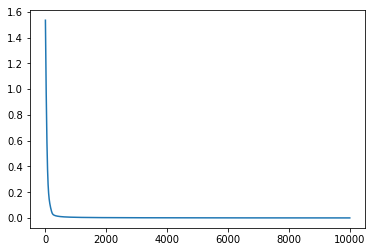

In [92]:
def experiment():

    ### WRITE YOUR CODE HERE - 10 MARKS
    X,y=loadIrisData()
    
    y_hot = one_hot_encoding(y,3)
    
#     print(y_hot)
    
    X_train, y_hot_train, X_test, y_hot_test = splitData(X,y_hot,0.2)
    
    X_train_normalized, X_test_normalized = normalizeX(X_train, X_test)
    
#     print(y_hot_train.shape, X_train_normalized.shape)
    no, nh, ni = 3, 5, 4
    
    NN = NeuralNetwork(ni,nh,no)
    
    
    weights2, Loss=NN.fit(X_train_normalized, y_hot_train,0.01,10000)
    
    labels = np.empty([X_test.shape[0],1])
    
    t = np.empty([X_test.shape[0],1])
    
    labels = NN.predict_label(X_test_normalized)
    
    t = predict_actual_value(y_hot_test)
    
    print(getCM(labels,t))
    plt.plot(Loss)
    
if __name__=="__main__":
    experiment()